# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп», разработав такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**План выполнения проекта**  
1. Загрузить и изучить данные.

2. Ответить на вопрос и обосновать решение.<br>
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    1. Изменится. Привести примеры матриц.
    2. Не изменится. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.<br><br>

3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

**Описание данных**  
Набор данных находится в файле `insurance.csv`.<br>
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.<br>
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

**Содержание**<a id='toc0_'></a>    
- 1. [Загрузка данных](#toc1_)    
- 2. [Умножение матриц](#toc2_)    
- 3. [Алгоритм преобразования](#toc3_)    
- 4. [Проверка алгоритма](#toc4_)    
- 5. [Общий вывод](#toc5_)    
- 6. [Чек-лист проверки](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Загрузка данных](#toc0_)

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Загрузим датасет и изучим его.

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


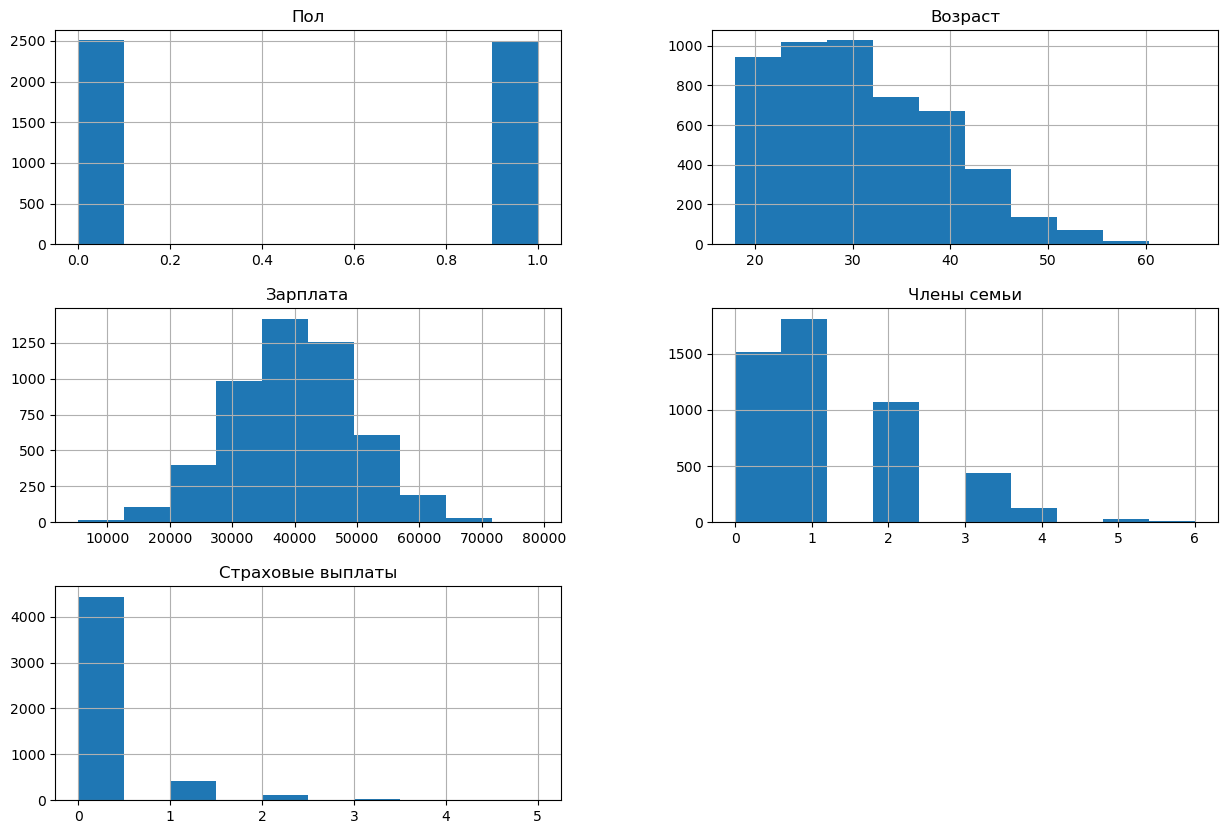

In [5]:
df.hist(figsize=(15, 10));

Заменим названия столбцов.

In [6]:
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance']

Все данныe можно привести к типу `int`.

In [7]:
df = df.astype(int)

**Вывод по разделу 1:**

Данные содержат 5000 строк и 5 столбцов, пропуски отсутствуют, аномалий нет, все столбцы приведены к типку `int`.

## 2. <a id='toc2_'></a>[Умножение матриц](#toc0_)

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:**
 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:**
Домножение матрицы признаков справа на обратимую матрицу не меняет качество линейной регрессии.

**Обоснование:**
<br>Пусть вектор признаков умножают на обратимую матрицу $P$.

Задача обучения примет вид:

$$
w = \arg\min_w MSE(XPw, y)
$$

Тогда формула обучения:
$$
w = ((XP)^T XP)^{-1} (XP)^T y 
$$

Предсказания:
$$
a = X P w = XP ((XP)^T XP)^{-1} (XP)^T y
$$

Учитывая, что

$(AB)^{-1} = B^{-1} A^{-1} \Rightarrow (ABC)^{-1} = C^{-1} B^{-1} A^{-1}$ 

$(AB)^T = B^T A^T$

$(AB)^{-T} = A^{-T} B^{-T}$

$A A^{-1} = E$

получим:
$$
a = XP (P^T (X^T X) P)^{-1} P^T X^T y =
$$

$$
= XP P^{-1} (X^T X)^{-1} P^{-T} P^T X^T y = X (X^T X)^{-1} X^T y
$$

Таким образом, вектор предсказаний не изменился.

**Вывод по разделу 2:**
Домножение матрицы признаков справа на обратимую матрицу не меняет качество линейной регрессии


## 3. <a id='toc3_'></a>[Алгоритм преобразования](#toc0_)

На основании полученнного результата можно предложить следующий алгоритм защиты данных пользователей.

**Алгоритм**

1. Генерируем случайную квадратную матрицу $P$ подходящей размерности (её порядок должен быть равен количеству столбцов в матрице признаков).
2. Проверяем матрицу на обратимость: её определитель не должен быть равен нулю.
<br>В случае, если проверка не пройдена, возвращаемся к шагу 1.
3. Умножаем матрицу признаков $Х$ справа на полученную ранее матрицу $P$.
4. Обучаем модель на матрице признаков $ХP$, полученной на предыдущем шаге.
5. Для получения вектора предсказаний необходимо домножить матрицу признаков на матрицу $P$, а затем применить созданную модель.
6. Сравниваем метрики R2 на исходных и зашифрованных признаках.

**Обоснование**

Обоснование приведено в предыдущем разделе.

## 4. <a id='toc4_'></a>[Проверка алгоритма](#toc0_)

Для практической проверки разработанного алгоритма обучим две модель: одну - на имеющихся данных; другую - на них же, но с использованием описанного выше метода шифрования. 

In [8]:
X = df.drop(columns=['insurance'])
y = df['insurance']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print('r2-метрика начальной модели:', r2_score(y, y_pred))

P = np.random.random(size=(X.shape[1], X.shape[1]))
print('Является ли матрица обратимой:', np.linalg.det(P) != 0)

model = LinearRegression()
model.fit(X @ P, y)
y_pred = model.predict(X @ P)
print('r2-метрика модифицированной модели:', r2_score(y, y_pred))


print('Данные до шифрования:')
display(X.head())

print('Данные после шифрования:')
display((X @ P).head())

print('Дешифрованные данные:')
display((X @ P @ np.linalg.inv(P)).apply(round).astype(int).head())

r2-метрика начальной модели: 0.42494550308169177
Является ли матрица обратимой: True
r2-метрика модифицированной модели: 0.4249455030816909
Данные до шифрования:


,gender,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Данные после шифрования:


,0,1,2,3
0,44111.717617,25257.098876,33318.474797,22113.385533
1,33807.632819,19363.642185,25530.350471,16950.363732
2,18685.851330,10704.220419,14109.604312,9369.134165
3,37074.847453,21221.074625,28008.281332,18582.911996
4,23217.308209,13296.902157,17534.166764,11640.364893


Дешифрованные данные:


,0,1,2,3
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Как мы видим, после применения описанного алгоритма значение целевой метрики не изменилось (с точностью до погрешности, связанной с хранением в памяти чисел с плавающей точкой).

При этом, из зашифрованнных данных невозможно получить личную информацию пользователей, не зная ключа (матрицы $P$).

Таким, образом рассмотренный алгоритм применим для защиты пользовательских данных.

## 5. <a id='toc5_'></a>[Общий вывод](#toc0_)

- Предлагаемые данные загружены и изучены
- Предложен алгоритм защиты данных пользователей
- Эффективность и применимость алгоритма обоснованы теоретически
- Работоспособность и качество алгоритма проверены на рассматриваемом датасете

## 6. <a id='toc6_'></a>[Чек-лист проверки](#toc0_)

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования